# Writing performant Julia code
- Example - Discretized Laplace operator
$$
u_{\text{out}}(i,j) = 0.25[u(i-1,j) + u(i+1,j) + u(i, j-1) + u(i, j+1)]
$$
![image.png](https://enccs.github.io/julia-for-hpc/_images/2D-Laplace-operator.png)

In [1]:
using Pkg
Pkg.activate("HPC")
# Pkg.add("CairoMakie")
# Pkg.add("BenchmarkTools")

  Activating project at `~/codes/Julia-HPC/HPC`


In [2]:
using CairoMakie, BenchmarkTools

In [3]:
function lap2d!(u, unew)
    M, N = size(u); 
    for j in 2:N-1
        for i in 2:M-1
            unew[i,j] = 0.25 * (u[i+1, j] + u[i-1, j] + u[i, j+1] + u[i, j-1])
        end
    end
end

lap2d! (generic function with 1 method)

In [4]:
function setup(N=4096, M = 4096)
    u = zeros(M,N);
    u[1,:] = u[end,:] = u[:,1] = u[:,end] .= 10
    unew = copy(u);
    return u, unew
end

setup (generic function with 3 methods)

In [5]:
u, unew = setup()

for i in 1:1000
    lap2d!(u, unew)
    u = copy(unew)
end


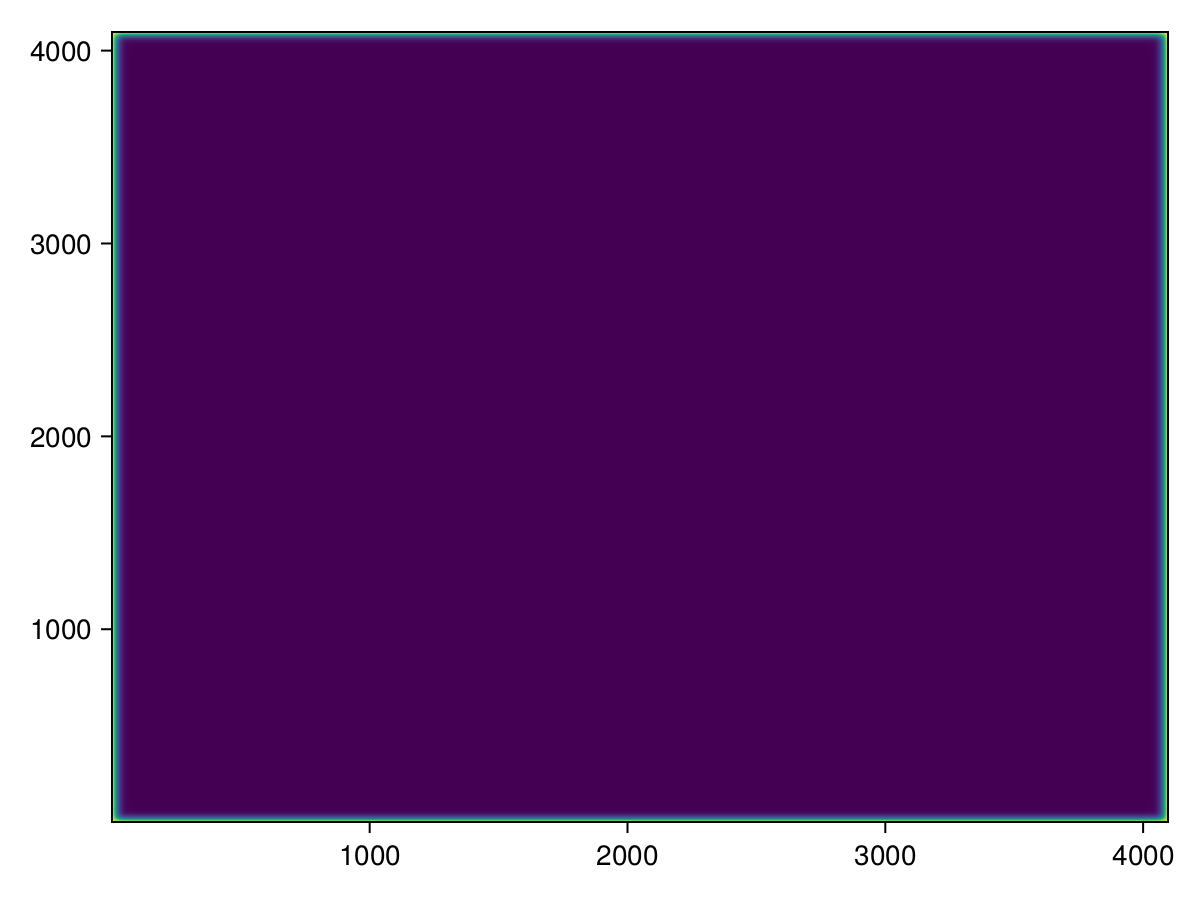

In [6]:
using CairoMakie
heatmap(u)

### Benchmarking
- `@btime` quick snity checks, prints the time an expression takes and the memory allocated
- `@benchmark` fuller benchmark on a given expression

In [7]:
using BenchmarkTools

In [8]:
@benchmark lap2d!(u, unew)

BenchmarkTools.Trial: 169 samples with 1 evaluation.
 Range (min … max):  29.282 ms …  33.943 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     29.508 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   29.684 ms ± 542.852 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

  █▁▁                                                           
  ███▄▆▄▆▃▅▄▄▃▃▄▄▄▂▃▃▃▃▂▃▄▄▂▄▃▁▃▂▂▂▂▂▂▁▂▁▂▁▂▂▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▂ ▂
  29.3 ms         Histogram: frequency by time         31.2 ms <

 Memory estimate: 0 bytes, allocs estimate: 0.

In [9]:
bench_results = @benchmark lap2d!(u,unew)
println(typeof(bench_results))
println(minimum(bench_results.times))

BenchmarkTools.Trial
2.9278378e7
